## Stroke Prediction

####  Our top priority in this health problem is to identify patients with a stroke. According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.


##### Attribute Information

#### 1) id: unique identifier
#### 2) gender: "Male", "Female" or "Other"
#### 3) age: age of the patient
#### 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
#### 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
#### 6) ever_married: "No" or "Yes"
#### 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
#### 8) Residence_type: "Rural" or "Urban"
#### 9) avg_glucose_level: average glucose level in blood
#### 10) bmi: body mass index
#### 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
#### 12) stroke: 1 if the patient had a stroke or 0 if not
##### Note: "Unknown" in smoking_status means that the information is unavailable for this patient

#### Importing Libraries:-

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [46]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [47]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [48]:
df.shape

(5110, 12)

In [49]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Checking Missing Values in Feature Variables :-

In [50]:
missing_data = df.isnull()
missing_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [51]:
for columns in df:
    print(columns)
    print(f"{missing_data[columns].value_counts()}")
    print("")

id
False    5110
Name: id, dtype: int64

gender
False    5110
Name: gender, dtype: int64

age
False    5110
Name: age, dtype: int64

hypertension
False    5110
Name: hypertension, dtype: int64

heart_disease
False    5110
Name: heart_disease, dtype: int64

ever_married
False    5110
Name: ever_married, dtype: int64

work_type
False    5110
Name: work_type, dtype: int64

Residence_type
False    5110
Name: Residence_type, dtype: int64

avg_glucose_level
False    5110
Name: avg_glucose_level, dtype: int64

bmi
False    4909
True      201
Name: bmi, dtype: int64

smoking_status
False    5110
Name: smoking_status, dtype: int64

stroke
False    5110
Name: stroke, dtype: int64



In [52]:
missing_data.sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### So we have missing value in "bmi" column which we will fill after seeing the distribution pattern.

<AxesSubplot:xlabel='bmi', ylabel='Density'>

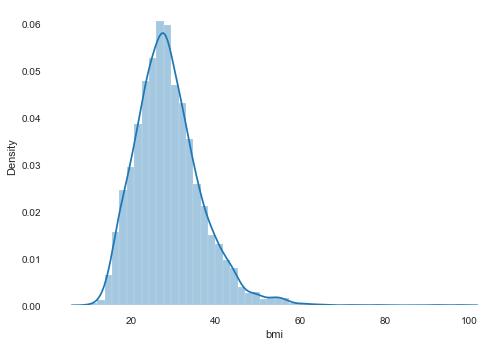

In [53]:
sns.distplot(df["bmi"])

##### From the plot we can see that bmi has a right skewed distribution  so we will not use mean value imputation.
##### In this case mode imputation is the most appropriate to fill my null values.

In [54]:
df["bmi"].fillna(df["bmi"].mode()[0],inplace = True)

In [55]:
df.isnull().sum().sum() 

0

In [115]:
df.shape

(5110, 12)

#### Now there are no missing values in my dataset.

#### Exploratory Data Analysis:-

#### Handling Categorical Columns with respect to label.

In [139]:
categorical_features= df.select_dtypes(exclude = np.number)
categorical_features                                       

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [129]:
categorical_features.columns


Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

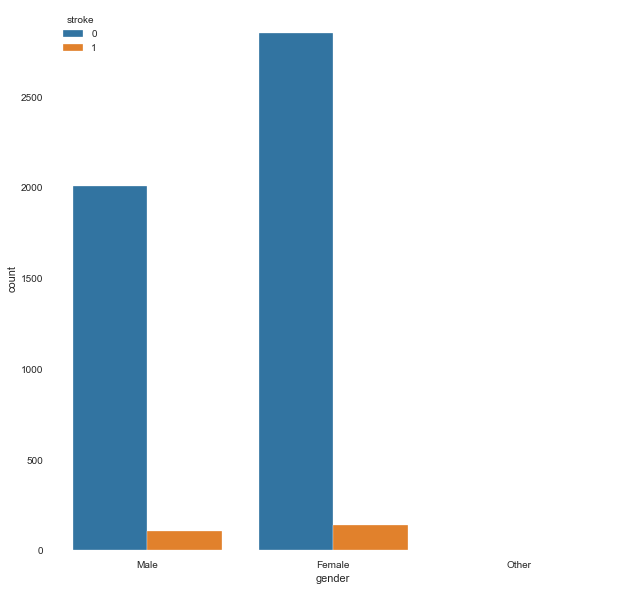

In [56]:
plt.figure(figsize=(10,10))
sns.countplot(x = "gender", hue= "stroke",data = df)
plt.show()

#### From the countplot we can say that Female has a minimal amount of more cases of stroke as comapred to Male.

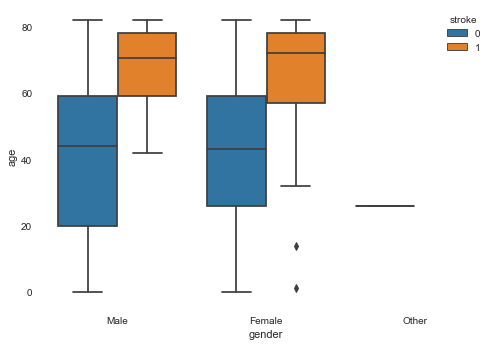

In [67]:
sns.boxplot(x = 'gender', y = 'age', hue ='stroke',data = df)
plt.show()

#### By this boxplot plotted between age and gender with taking stroke as hue parameter  some observations are noted:-
#### 1) Male between the age of 20 and 60 years has not suffered stroke and Females also has the same trend.
#### 2) Stroke cases of Female between the age of 60 and 80 Years are slightly more than that of male from the same age group.

#### Out of 5110 people ,majority of the individuals dont have any heart disease,only 276 people are suffering from heart disease.

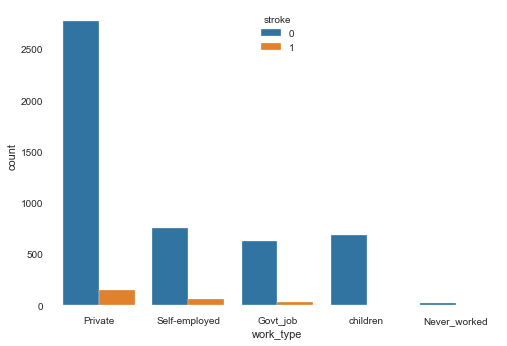

In [113]:
sns.countplot(x = "work_type", hue = "stroke",data = df)
plt.show()

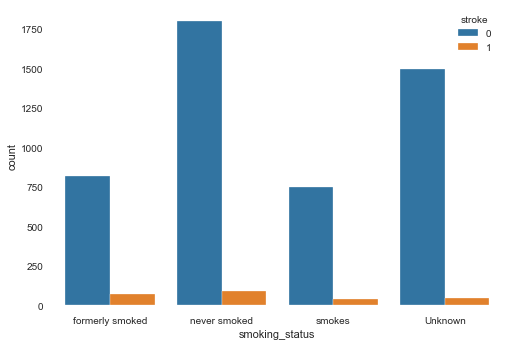

In [118]:
sns.countplot(x = "smoking_status",hue = 'stroke',data = df)
plt.show()

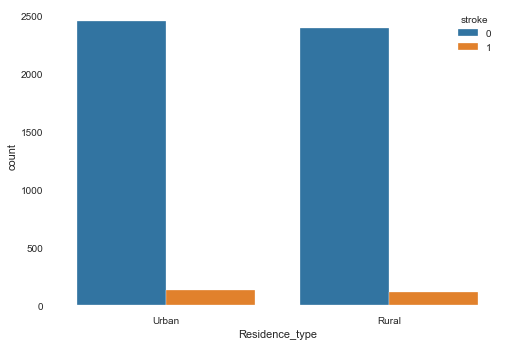

In [140]:
sns.countplot(x = "Residence_type",hue = 'stroke',data = df)
plt.show()

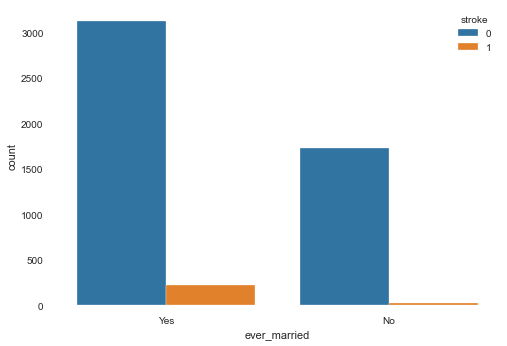

In [153]:
sns.countplot(x = "ever_married",hue = 'stroke',data = df)
plt.show()

In [151]:
count = df["ever_married"].value_counts()
count

Yes    3353
No     1757
Name: ever_married, dtype: int64

<AxesSubplot:ylabel='ever_married'>

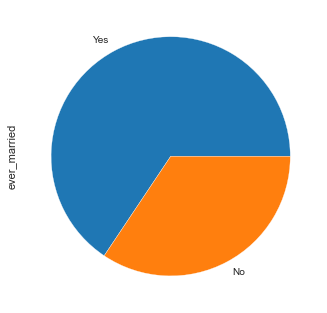

In [152]:
count.plot.pie(y = "ever_married")

In [107]:
count = df["heart_disease"].value_counts()
count

0    4834
1     276
Name: heart_disease, dtype: int64

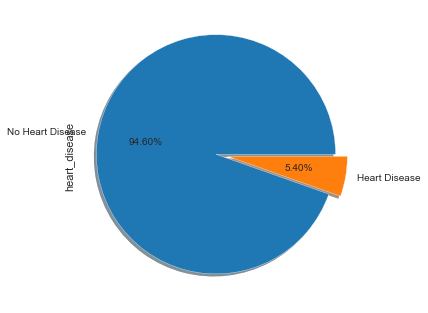

In [108]:
myexplodes = [0.1,0]
lab = ["No Heart Disease","Heart Disease"]
count.plot.pie(y = "heart_disease",shadow = True,explode = myexplodes,autopct='%1.2f%%',labels = lab)
plt.show()

In [336]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [337]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [338]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

#### Handling numerical_features:-

In [155]:
numerical_features = df.select_dtypes(include = np.number)
numerical_features.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,28.7,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


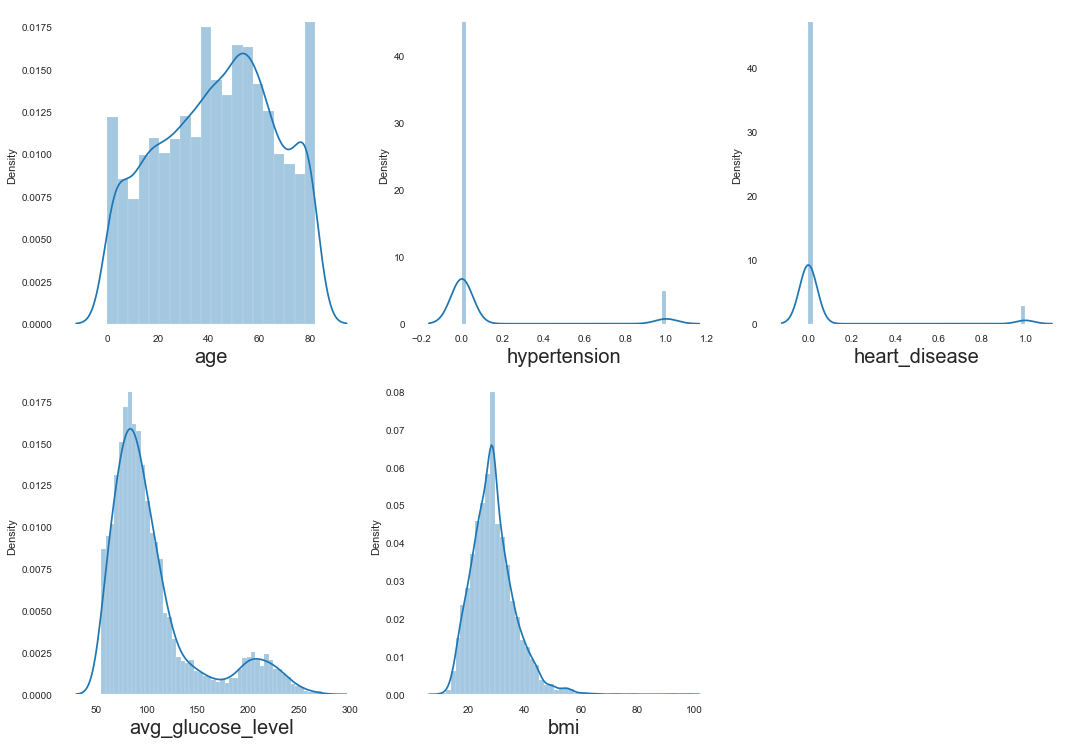

In [185]:
plt.figure(figsize=(15,15), facecolor='white')
plotnumber=1

for column in numerical_features.iloc[:,1:6]:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(numerical_features[column])
        plt.xlabel(column, fontsize=20)
        plotnumber+=1
        
plt.tight_layout()

#### From the distplot we can say that  featrue variables of avg_glucose_level hypertension and heart_disease are highly skewed in distribution and are left skewed.
#### bmi and age can be considered as gaussian distributed.


In [178]:
df["bmi"].skew()

1.0796402658437754

In [179]:
df["heart_disease"].skew()

3.947243966661894

In [180]:
df["age"].skew()

-0.1370593225984694

In [181]:
df["avg_glucose_level"].skew()

1.5722838665030459

In [182]:
df['hypertension'].skew()

2.7153916581245294

#### Checking Outliers with the help of boxplot:-

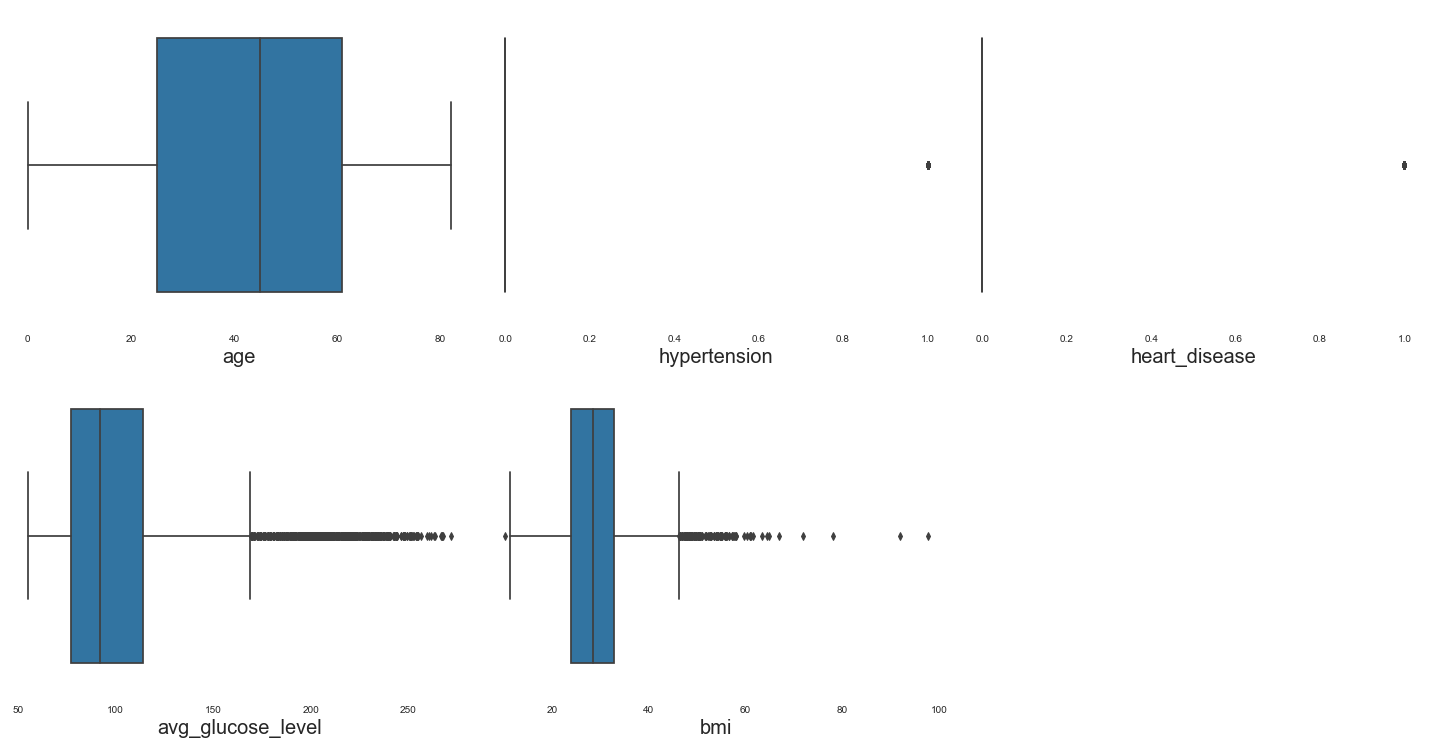

In [184]:
plt.figure(figsize = (20,15), facecolor = 'white')
plotnumber = 1
for column in numerical_features.iloc[:,1:6]:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(numerical_features[column])
    plt.xlabel(column,fontsize = 20)
    plotnumber+=1
    
plt.tight_layout()



#### As we will use Tree based Algo and they are robust to outliers  so it will not effect our models.

In [191]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [202]:
categorical_features

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [195]:
dummies_df = pd.get_dummies(categorical_features,drop_first = True)
dummies_df

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,1,0,1,0,0,1,1,0,0
1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,1,0,1,0,0,0,0,1,0
3,0,0,1,0,1,0,0,1,0,0,1
4,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0,1,0,1,0,0,1,0,1,0
5106,0,0,1,0,0,1,0,1,0,1,0
5107,0,0,1,0,0,1,0,0,0,1,0
5108,1,0,1,0,1,0,0,0,1,0,0


In [198]:
data = pd.concat([df,dummies_df],axis = 1)
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,0,1,0,1,0,0,1,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,...,0,1,0,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,0,1,0,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,0,1,0,1,0,0,1,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0,1,0,0,1,0,0,0,1,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,...,0,1,0,1,0,0,1,1,0,0
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,...,0,1,0,1,0,0,0,0,1,0
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,...,0,0,0,1,0,0,1,0,1,0
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.7,...,0,1,0,1,0,0,0,0,0,0
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,...,0,1,0,1,0,0,1,0,0,0


In [197]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_Male', 'gender_Other',
       'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [204]:
data = data.drop(columns = categorical_features,axis = 1)
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.7,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [205]:
data.shape

(5110, 18)

#### Dropping the feature which is not important.

In [208]:
data.drop(["id"],axis = 1,inplace = True)

In [209]:
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.7,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


#### Checking MultiCollinearity between features with the help of  Heatmap.

In [217]:
data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.276398,0.263796,0.238171,0.325553,0.245257,-0.027623,-0.010659,0.679125,-0.078653,0.116534,0.327989,-0.634215,0.014180,0.236897,0.119307,0.073133
hypertension,0.276398,1.000000,0.108306,0.174474,0.159733,0.127904,0.021275,-0.004597,0.164243,-0.021608,-0.005413,0.115442,-0.129506,-0.007913,0.058853,0.065063,0.031240
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038417,0.134914,0.085717,-0.003343,0.114644,-0.015712,0.000027,0.086760,-0.091634,0.003092,0.066804,-0.021856,0.044049
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168301,0.131945,0.054580,0.011489,0.155068,-0.014675,0.016588,0.062694,-0.102250,-0.004946,0.068111,0.023885,0.017646
bmi,0.325553,0.159733,0.038417,0.168301,1.000000,0.038257,-0.025671,-0.011788,0.335524,-0.028534,0.203892,0.070663,-0.442678,-0.000158,0.104084,0.106569,0.085293
stroke,0.245257,0.127904,0.134914,0.131945,0.038257,1.000000,0.009117,-0.003166,0.108340,-0.014882,0.011888,0.062168,-0.083869,0.015458,0.064556,-0.004129,0.008939
gender_Male,-0.027623,0.021275,0.085717,0.054580,-0.025671,0.009117,1.000000,-0.011757,-0.029936,0.011496,-0.032639,-0.025971,0.089283,-0.005937,0.042738,-0.098813,0.011477
gender_Other,-0.010659,-0.004597,-0.003343,0.011489,-0.011788,-0.003166,-0.011757,1.000000,-0.019327,-0.000920,0.012092,-0.006112,-0.005514,-0.014217,0.030568,-0.010728,-0.005978
ever_married_Yes,0.679125,0.164243,0.114644,0.155068,0.335524,0.108340,-0.029936,-0.019327,1.000000,-0.090838,0.153830,0.192716,-0.544441,0.006261,0.171256,0.102845,0.105226
work_type_Never_worked,-0.078653,-0.021608,-0.015712,-0.014675,-0.028534,-0.014882,0.011496,-0.000920,-0.090838,1.000000,-0.076081,-0.028728,-0.025915,0.022859,-0.030095,0.036238,-0.028099


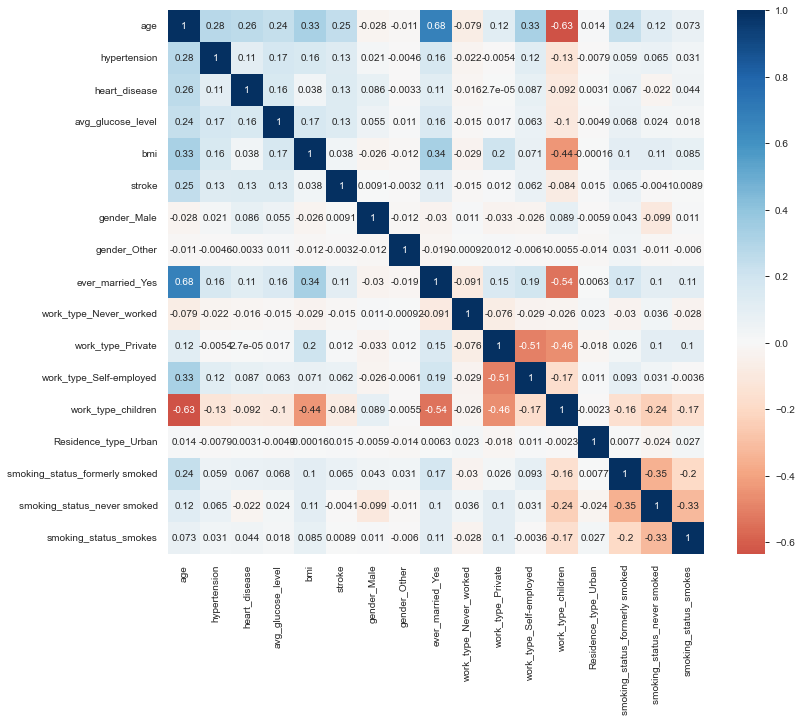

In [220]:
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(),annot = True,cmap = 'RdBu',center = 0)
plt.show()

## Spliting Data into Training and Testing dataset.

In [224]:
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.7,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [225]:
X = data.drop(['stroke'],axis = 1)
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.7,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.7,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,1,0,1,0,1,0,0,0,1,0,0


In [241]:
Y = data['stroke']
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [242]:
print(f"The shape of X is :{X.shape}")
print(f"The shape of Y is :{Y.shape}")

The shape of X is :(5110, 16)
The shape of Y is :(5110,)


In [250]:
from sklearn.preprocessing import StandardScaler

In [251]:
sc = StandardScaler()

In [252]:
sc.fit_transform(X)

array([[ 1.05143428, -0.32860186,  4.18503199, ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.78607007, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 1.62639008, -0.32860186,  4.18503199, ..., -0.45767615,
         1.30416474, -0.42731326],
       ...,
       [-0.36384151, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 0.34379639, -0.32860186, -0.2389468 , ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.03420481, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326]])

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

### Model Selection

In [299]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [300]:
decision.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [301]:
X_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
42,82.0,0,1,144.90,26.4,1,0,1,0,1,0,0,1,0,0,1
380,4.0,0,0,106.22,16.7,1,0,0,0,0,0,1,0,0,0,0
3524,58.0,0,0,79.95,25.9,1,0,1,0,1,0,0,1,0,1,0
352,20.0,0,0,96.57,34.1,0,0,0,0,1,0,0,0,0,1,0
4927,10.0,0,0,69.84,13.7,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,43.0,0,0,75.05,22.9,0,0,1,0,1,0,0,0,0,0,1
4446,42.0,0,0,191.94,27.9,0,0,1,0,1,0,0,1,0,1,0
660,52.0,0,0,69.37,36.2,1,0,0,0,1,0,0,0,0,0,0
57,78.0,0,0,237.75,28.7,1,0,1,0,1,0,0,1,1,0,0


In [302]:
Y_test

42      1
380     0
3524    0
352     0
4927    0
       ..
472     0
4446    0
660     0
57      1
2367    0
Name: stroke, Length: 1022, dtype: int64

In [303]:
Y_pred_test = decision.predict(X_test)
Y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [305]:
Y_pred_train = decision.predict(X_train)
Y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [288]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [307]:
confusion_matrix(Y_train, Y_pred_train)

array([[3893,    0],
       [   0,  195]], dtype=int64)

In [309]:
acc  = accuracy_score(Y_test,Y_pred_test)
acc

0.9187866927592955

In [310]:
decision.score(X_test,Y_test)*100

91.87866927592955

In [311]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)

SVC()

In [312]:
model.score(X_test,Y_test)

0.9471624266144814

In [314]:
Y_pred_test = model.predict(X_test)

In [317]:
accuracy = accuracy_score(Y_test,Y_pred_test)
accuracy

0.9471624266144814

In [318]:
model.score(X_test,Y_test)*100

94.71624266144813

In [319]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   1.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   1.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   1.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   1.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   1.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.952 total time=   1.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.952 total time=   1.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.952 total time=   1.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.952 total time=   1.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.952 total time=   1.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.952 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.952 total time=   1.7s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.952 total time=   1.7s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.952 total time=   1.8s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.952 total time=   1.7s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.944 total time=   1.3s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.946 total time=   1.2s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.935 total time=   1.2s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.940 total time=   1.2s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.944 total time=   1.2s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.907 total time=   0.4s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.910 total time=   0.3s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.905 total time=   0.3s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [320]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [321]:
from sklearn.svm import SVC
model = SVC(C= 0.1, gamma = 1, kernel = 'rbf')
model.fit(X_train,Y_train)

SVC(C=0.1, gamma=1)

In [323]:
model.score(X_test,Y_test)

0.9471624266144814

In [325]:
Y_pred_test = model.predict(X_test)
Y_pred_test 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [326]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



#### Model is giving around 95% accuracy so now we will save this model.

In [329]:
import pickle

#### Creating a pickle file for StandardScaler

In [331]:
filename = 'sc.pkl'
pickle.dump(sc,open(filename,'wb'))

#### Creating a pickle file for our Model

In [333]:
file = 'model_stroke_predictor.pkl'
pickle.dump(model,open(file,'wb'))

#### Model Prediction:-

In [335]:
loaded_model = pickle.load(open(file,'rb'))
prediction=loaded_model.predict(([[82.0,0,1,144.90,26.4,1,0,1,0,1,0,0,1,0,0,1]]))
if prediction==1:
    print("Stroke")
else:
    print("No stroke")


No stroke
